<img src="img/img_covid.jpg">

## COVID-19 no Brasil

O Coronavírus (COVID-19) é uma doença infecciosa causada por um vírus. Ele causa problemas respiratórios semelhantes à gripe e sintomas como tosse, febre e, em casos mais graves, dificuldade para respirar.

O Brasil teve seu primeiro caso de Coronavírus confirmado no dia 26/02/2020 em São Paulo. 14 dias após a descoberta do primeiro caso o país já começou a passar por algumas mudanças em sua rotina, como por exemplo, suspensão de aulas e eventos com número elevado de pessoas, fechamento de lojas, bares, restaurantes e shoppings, além de recomendações constantes sobre a importância do isolamento social no combate à doença. Um mês depois do primeiro caso diversas cidades estavam com as ruas vazias por conta das medidas de isolamento e o número de pessoas contaminadas já havia chegado a 1000, hoje - 26/04/2020 - esse número já passa de 60000 casos confirmados e 4000 mortes.

<hr style="height:1px;border-width:0;color:gray;background-color:#C0C0C0">

Nesse projeto farei uma análise mostrando a evolução da doença no país e nos estados com o maior número de casos, utilizando a base de dados do Painel Coronavírus (https://covid.saude.gov.br/)



In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cv = pd.read_csv('datasets/arquivo_geral.csv',sep=';')

#### Analise inicial e tratamento dos dados

In [3]:
cv.head()

regiao estado        data  casosNovos  casosAcumulados  obitosNovos  \
0  Norte     RO  2020-01-30           0                0            0   
1  Norte     RO  2020-01-31           0                0            0   
2  Norte     RO  2020-02-01           0                0            0   
3  Norte     RO  2020-02-02           0                0            0   
4  Norte     RO  2020-02-03           0                0            0   

   obitosAcumulados  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [4]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2376 entries, 0 to 2375
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   regiao            2376 non-null   object
 1   estado            2376 non-null   object
 2   data              2376 non-null   object
 3   casosNovos        2376 non-null   int64 
 4   casosAcumulados   2376 non-null   int64 
 5   obitosNovos       2376 non-null   int64 
 6   obitosAcumulados  2376 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 102.2+ KB


In [5]:
cv.describe()

casosNovos  casosAcumulados  obitosNovos  obitosAcumulados
count  2376.000000      2376.000000  2376.000000       2376.000000
mean     26.047138       325.387626     1.769781         19.384680
std     103.251739      1355.918765     9.000469        101.966381
min       0.000000         0.000000     0.000000          0.000000
25%       0.000000         0.000000     0.000000          0.000000
50%       0.000000         1.000000     0.000000          0.000000
75%      12.000000       112.000000     0.000000          3.000000
max    2178.000000     20715.000000   211.000000       1700.000000

In [6]:
#criar um dataframe sem todas aquelas informações de data repetidas

#Seleciona a data mostrando apenas UMA vez cada data
lista_data = cv['data'].unique()

#Criando listas para armazenar os dados na mesma quantidade da lista com as datas
lista_casosAcumulados = []
lista_obitosAcumulados = []
lista_casosNovos = []
lista_obitosNovos = []

#Criado um laço que para cada iteração do dia ele grave nas listas a soma dos valores
#daquele dia em todos os estados
for dia in range(len(lista_data)):
    lista_casosAcumulados.append(cv[cv['data'] == lista_data[dia]]['casosAcumulados'].sum())
    lista_casosNovos.append(cv[cv['data'] == lista_data[dia]]['casosNovos'].sum())
    lista_obitosAcumulados.append(cv[cv['data'] == lista_data[dia]]['obitosAcumulados'].sum())
    lista_obitosNovos.append(cv[cv['data'] == lista_data[dia]]['obitosNovos'].sum())

#Transfomo as listas em Series
data = pd.Series(lista_data)
casosAcumulados = pd.Series(lista_casosAcumulados)
obitosAcumulados = pd.Series(lista_obitosAcumulados)
casosNovos = pd.Series(lista_casosNovos)
obitosNovos = pd.Series(lista_obitosNovos)

#Crio um DataFrame a partir da data
df_por_data = data.to_frame(name='data')

#Cria as colunas com os dados no Dataframe
df_por_data['casosAcumulados'] = casosAcumulados
df_por_data['obitosAcumulados'] = obitosAcumulados
df_por_data['casosNovos'] = casosNovos
df_por_data['obitosNovos'] = obitosNovos

df_por_data.head()

data  casosAcumulados  obitosAcumulados  casosNovos  obitosNovos
0  2020-01-30                0                 0           0            0
1  2020-01-31                0                 0           0            0
2  2020-02-01                0                 0           0            0
3  2020-02-02                0                 0           0            0
4  2020-02-03                0                 0           0            0

# Dados da doença no Brasil

## Estados com mais casos 

In [7]:
#Pega sempre a informação do ultimo dia do dataset
ultimo_dia = cv[['casosAcumulados','data']].max()[1]

#Filtra os casos acumulados por estado com a maior quantiddade de casos
maior_n_casos = cv[cv['data'] == ultimo_dia][['estado','casosAcumulados']].sort_values(by='casosAcumulados',ascending=False)
#Corrige o indice
maior_n_casos.reset_index(inplace=True,drop=True)
#Renomeia as colunas
maior_n_casos.columns = [['Estado','Casos Acumulados']]
#imprime os 5 primeiros
maior_n_casos.head()

Estado Casos Acumulados
0     SP            20715
1     RJ             7111
2     CE             5833
3     PE             4898
4     AM             3833

A listagem acima mostra os 5 estados que possuem o maior numero de casos. É importante observar que esses estados têm algumas das metropoles do país, onde vivem um grande número de pessoas, ambiente ideal para a propagação do vírus. Desde o começo da pademia São Paulo lidera com o maior número de casos.

In [8]:
#Seleciona os estados com o menor numero de caso
maior_n_casos.tail()

Estado Casos Acumulados
22     AC              279
23     MT              250
24     MS              234
25     SE              159
26     TO               58

Um fato interessante nesses dados é que a quantidade de casos em Tocantins é muito menor que nos outros estados, se for comparar com São Paulo por exemplo, o número é 357 vezes menor. Dois fatores podem estar relacionados com esses números, o primeiro é o fato de Tocantis não possuir uma grande metrópole ou ser um polo industrial que são características que os estados com o maior número de contaminados possuem, outro fator pode estar relacionado com a subnotificação dos casos, problema que vem sendo levantado por diversos canais de noticias em todo o país.

In [9]:
print('Atualmente o Brasil possui no total',df_por_data['casosNovos'].sum(),'Casos de COVID-19 e',df_por_data['obitosNovos'].sum(),'obitos,',
     'a doença tem uma letalidade de {x}%'.format(x=round(df_por_data['obitosNovos'].sum()/df_por_data['casosNovos'].sum() * 100,2)))

Atualmente o Brasil possui no total 61888 Casos de COVID-19 e 4205 obitos, a doença tem uma letalidade de 6.79%


## Evolução da doença por dia no Brasil

In [10]:
#Setando um grid
sns.set_style("darkgrid")

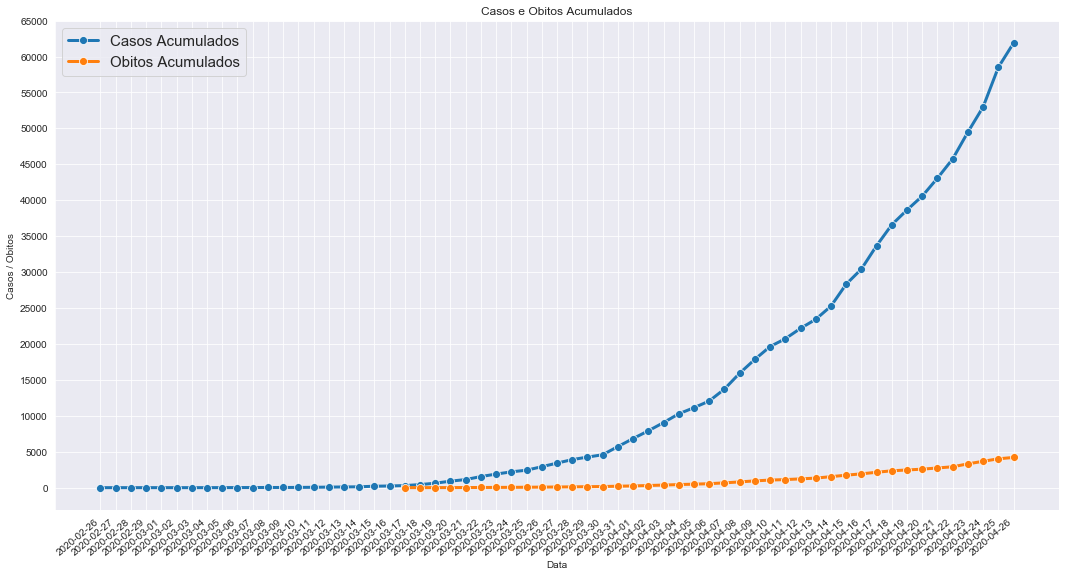

In [11]:
#IMPRESSÃO DO GRAFICO (Casos e Obitos Acumulados x Data)

plt.figure(figsize=(18,9))
sns.lineplot(x='data',y=df_por_data[df_por_data['casosAcumulados'] > 0]['casosAcumulados'],data=df_por_data,lw=3,marker='o',
             markersize=8,label='Casos Acumulados')
sns.lineplot(x='data',y=df_por_data[df_por_data['obitosAcumulados'] > 0]['obitosAcumulados'],data=df_por_data,lw=3,marker='o',
             markersize=8,label='Obitos Acumulados')

#Aumenta a legenda
plt.yticks(np.arange(0,df_por_data[df_por_data['casosAcumulados'] > 0]['casosAcumulados'].max() + 5001,5000))
#Inclina a escala
plt.xticks(rotation=40, horizontalalignment='right')
plt.title('Casos e Obitos Acumulados')
plt.ylabel('Casos / Obitos')
plt.xlabel('Data')

#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 15

plt.legend()
plt.show()

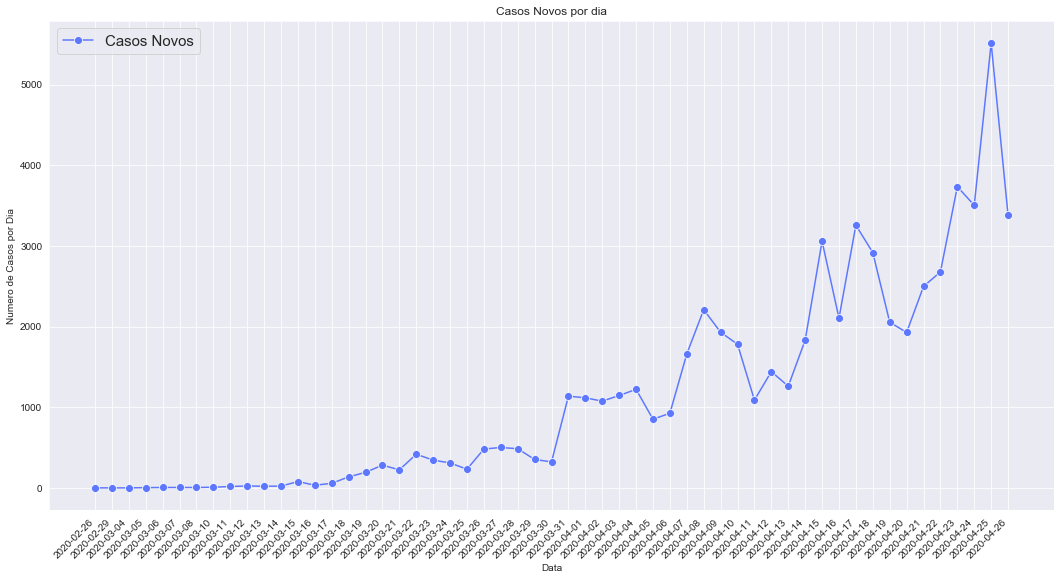

In [12]:
#TESTE DE IMPRESSÃO DO GRAFICO (Casos Novos por dia)

plt.figure(figsize=(18,9))
sns.lineplot(x='data',y=df_por_data[df_por_data['casosNovos'] > 0]['casosNovos'],data=df_por_data,marker='o',
             markersize=8,color='#5D78FF',label='Casos Novos')

#Inclina a escala
plt.xticks(rotation=45, horizontalalignment='right')
plt.title('Casos Novos por dia')
plt.ylabel('Numero de Casos por Dia')
plt.xlabel('Data')

#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 15
plt.legend()

plt.show()

              Casos Confirmados
regiao                         
Sudeste                   31077
Nordeste                  17531
Norte                      7600
Sul                        3557
Centro-Oeste               2123


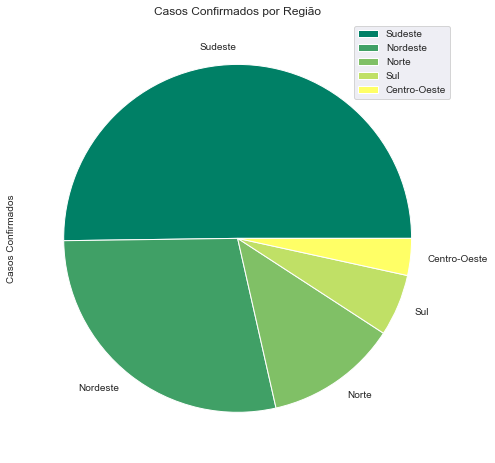

In [13]:
#Fazer grafico de casos por região
total_casos_por_regiao = cv.groupby('regiao')[['estado','casosNovos']].sum().sort_values(by='casosNovos',ascending=False)
total_casos_por_regiao.columns = ['Casos Confirmados']

print(total_casos_por_regiao)
#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 10
total_casos_por_regiao.plot(kind='pie',subplots=True,figsize=(8,8),cmap='summer')
#colors=['#FF4500','#FF8C00','#FFA500','#FFD700','#FFFF00']
plt.title('Casos Confirmados por Região')

plt.show()

              Obitos Confirmados
regiao                          
Sudeste                     2457
Nordeste                    1079
Norte                        452
Sul                          149
Centro-Oeste                  68


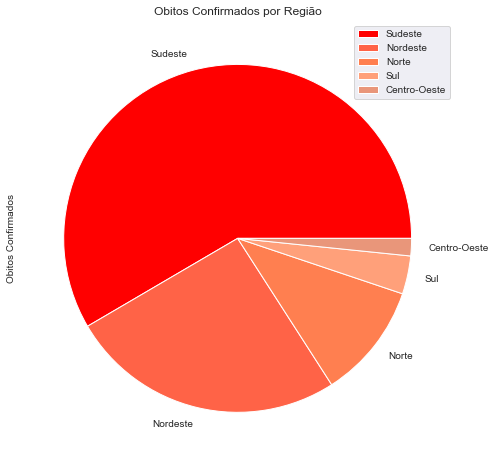

In [14]:
#Fazer grafico de Obitos por região
total_casos_por_regiao = cv.groupby('regiao')[['estado','obitosNovos']].sum().sort_values(by='obitosNovos',ascending=False)
total_casos_por_regiao.columns = ['Obitos Confirmados']

print(total_casos_por_regiao)
#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 10

total_casos_por_regiao.plot(kind='pie',subplots=True,figsize=(8,8),colors=['#FF0000','#FF6347','#FF7F50','#FFA07A','#E9967A'])
plt.title('Obitos Confirmados por Região')

plt.show()

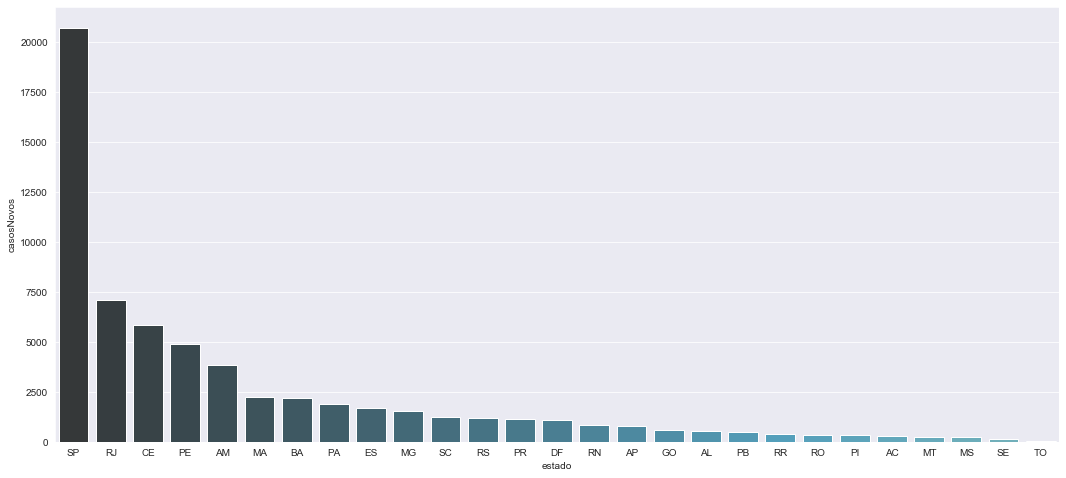

In [15]:
#Agrupa os estados e os casos, soma e ordena pela quantidade de casos
total_casos_por_estado = cv.groupby('estado')[['estado','casosNovos']].sum().sort_values(by='casosNovos',ascending=False)
#Remove o estado que ficou como index
total_casos_por_estado = total_casos_por_estado.reset_index()

plt.figure(figsize=(18,8))
sns.barplot(x='estado',y='casosNovos',data=total_casos_por_estado,
            palette=sns.color_palette("GnBu_d",n_colors=len(total_casos_por_estado)+12 ))

plt.show()

In [16]:
#Casos por semana

In [17]:
#Pensar em mais informações


<strong>Links Úteis:</strong>
* https://oglobo.globo.com/sociedade/coronavirus/em-colapso-pelo-coronavirus-manaus-enterra-1249-em-duas-semanas-ja-teme-falta-de-caixoes-24388568


# ------------------------------------------------------------------------------------<br>
### PERIGO ZONA DE TESTES<br>
# ------------------------------------------------------------------------------------

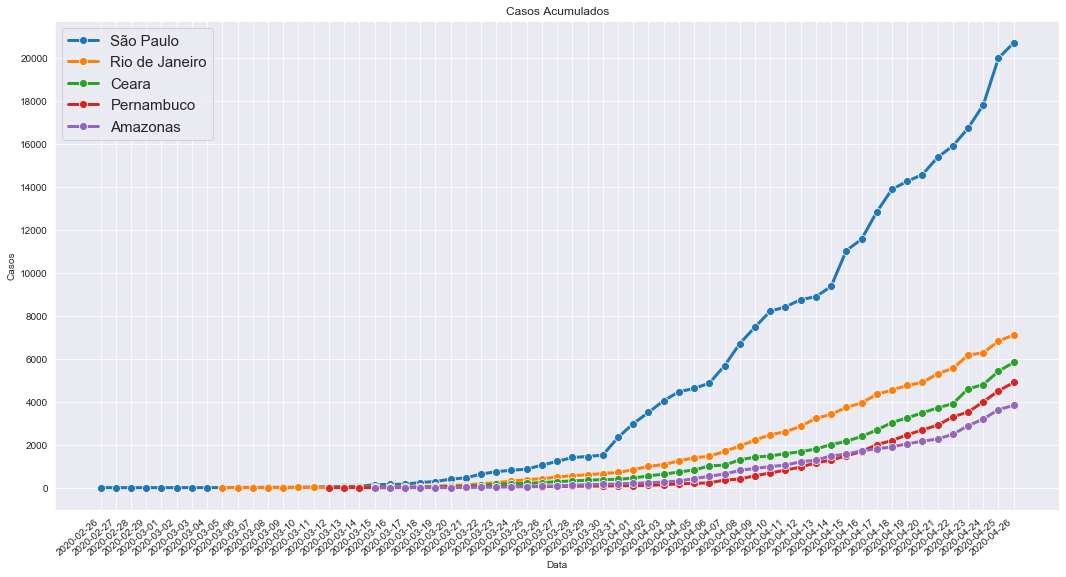

In [18]:
#IMPRESSÃO DO GRAFICO (Casos e Obitos Acumulados x Data) DOS ESTADOS MAIS ATINGIDOS

plt.figure(figsize=(18,9))
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'SP')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='São Paulo')
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'RJ')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='Rio de Janeiro')
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'CE')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='Ceara')
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'PE')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='Pernambuco')
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'AM')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='Amazonas')
#Aumenta a legenda
plt.yticks(np.arange(0,cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'SP')]['casosAcumulados'].max() + 1000,2000))
#Inclina a escala
plt.xticks(rotation=40, horizontalalignment='right')
plt.title('Casos Acumulados')
plt.ylabel('Casos')
plt.xlabel('Data')

#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 15

plt.legend()
plt.show()

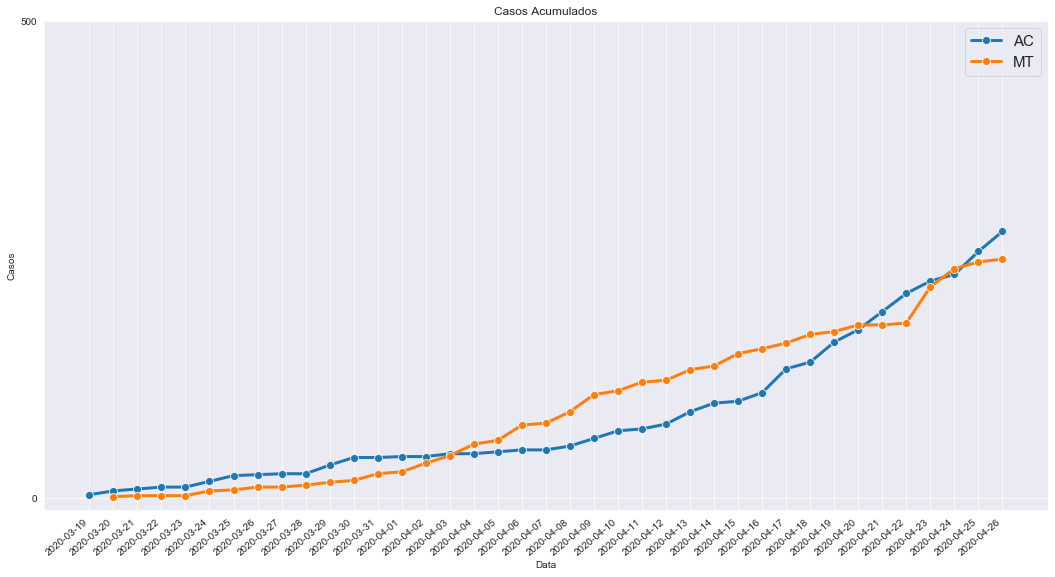

In [24]:
#IMPRESSÃO DO GRAFICO (Casos e Obitos Acumulados x Data) DOS ESTADOS MAIS ATINGIDOS

plt.figure(figsize=(18,9))
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'AC')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='AC')
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'MT')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='MT')
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'MT')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='MT')

#Aumenta a legenda
plt.yticks(np.arange(0,cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'AC')]['casosAcumulados'].max() * 2,500))
#Inclina a escala
plt.xticks(rotation=40, horizontalalignment='right')
plt.title('Casos Acumulados')
plt.ylabel('Casos')
plt.xlabel('Data')

#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 15

plt.legend()
plt.show()

In [ ]:
AC	279
23	MT	250
24	MS	234
25	SE	159
26	TO	